## Correlation between the RV of current 10 mins and the target, and trade data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import pingouin as pg
from scipy.stats import chi2

In [2]:
import sys
sys.path.append("../")
import importlib

from proj_mod import data_processing, training
importlib.reload(data_processing);
importlib.reload(training);

In [3]:
path_book="../raw_data/kaggle_ORVP/book_train.parquet"

In [4]:
df_train=pd.read_csv("../raw_data/kaggle_ORVP/train.csv")

In [5]:
df_train

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
428927,126,32751,0.003461
428928,126,32753,0.003113
428929,126,32758,0.004070
428930,126,32763,0.003357


In [6]:
len_train=len(df_train)

In [6]:
df_train["row_id"]=df_train["stock_id"].astype(str)+"-"+df_train["time_id"].astype(str)

In [7]:
df_train["stock_id"]=df_train["stock_id"].astype(int)
df_train["time_id"]=df_train["time_id"].astype(int)

df_train

,stock_id,time_id,target,row_id
0,0,5,0.004136,0-5
1,0,11,0.001445,0-11
2,0,16,0.002168,0-16
3,0,31,0.002195,0-31
4,0,62,0.001747,0-62
...,...,...,...,...
428927,126,32751,0.003461,126-32751
428928,126,32753,0.003113,126-32753
428929,126,32758,0.004070,126-32758
428930,126,32763,0.003357,126-32763


# Load in the precalculated RV values (see data_processing_functions.ipynb)

In [8]:
df_RV=pd.read_csv("../processed_data/RV_by_row_id.csv")

In [9]:
df_RV

,row_id,RV
0,0-5,0.004499
1,0-11,0.001204
2,0-16,0.002369
3,0-31,0.002574
4,0-62,0.001894
...,...,...
428927,99-32751,0.001436
428928,99-32753,0.001795
428929,99-32758,0.001658
428930,99-32763,0.002213


## Load in precalculated trade data (see data_processing_functions.ipynb)

In [11]:
df_trade_vals=pd.read_csv("../processed_data/trade_vals_by_row_id.csv")

In [13]:
df_trade_vals

,price_mean,price_std,size_sum,size_mean,size_std,order_count_sum,order_count_mean,order_count_std,row_id
0,1.003722,0.000578,3179,79.475000,118.375107,110,2.750000,2.467741,0-5
1,1.000206,0.000304,1289,42.966667,77.815203,57,1.900000,1.446756,0-11
2,0.999204,0.000932,2161,86.440000,113.587000,68,2.720000,2.300725,0-16
3,0.999020,0.000729,1962,130.800000,144.828569,59,3.933333,4.043808,0-31
4,0.999618,0.000182,1791,81.409091,117.914682,89,4.045455,4.099678,0-62
...,...,...,...,...,...,...,...,...,...
428908,1.000635,0.000431,48894,474.699029,534.042552,494,4.796117,4.598293,99-32751
428909,1.000694,0.000664,48635,528.641304,717.778741,585,6.358696,6.732864,99-32753
428910,0.998246,0.000552,50438,600.452381,1177.948006,457,5.440476,7.490317,99-32758
428911,0.998905,0.000309,47020,283.253012,372.698606,588,3.542169,3.248501,99-32763


## Create the extended dataframe with RV. One can also include the trade data now. 

In [10]:
df_extended=pd.merge(df_train,df_RV,on="row_id")

In [11]:
df_extended

,stock_id,time_id,target,row_id,RV
0,0,5,0.004136,0-5,0.004499
1,0,11,0.001445,0-11,0.001204
2,0,16,0.002168,0-16,0.002369
3,0,31,0.002195,0-31,0.002574
4,0,62,0.001747,0-62,0.001894
...,...,...,...,...,...
428927,126,32751,0.003461,126-32751,0.003691
428928,126,32753,0.003113,126-32753,0.004104
428929,126,32758,0.004070,126-32758,0.003118
428930,126,32763,0.003357,126-32763,0.003661


In [12]:
import gc 
del df_train
del df_RV 
gc.collect()

20

## - Below is for including more data 

In [43]:
df_extended=pd.merge(df_extended,df_trade_vals,on="row_id")

In [44]:
df_extended

,stock_id,time_id,target,row_id,RV,price_mean,price_std,size_sum,size_mean,size_std,order_count_sum,order_count_mean,order_count_std
0,0,5,0.004136,0-5,0.004499,1.003722,0.000578,3179,79.475000,118.375107,110,2.750000,2.467741
1,0,11,0.001445,0-11,0.001204,1.000206,0.000304,1289,42.966667,77.815203,57,1.900000,1.446756
2,0,16,0.002168,0-16,0.002369,0.999204,0.000932,2161,86.440000,113.587000,68,2.720000,2.300725
3,0,31,0.002195,0-31,0.002574,0.999020,0.000729,1962,130.800000,144.828569,59,3.933333,4.043808
4,0,62,0.001747,0-62,0.001894,0.999618,0.000182,1791,81.409091,117.914682,89,4.045455,4.099678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428908,126,32751,0.003461,126-32751,0.003691,0.999289,0.000461,2570,69.459459,102.734446,103,2.783784,2.819921
428909,126,32753,0.003113,126-32753,0.004104,1.002344,0.001231,2323,54.023256,71.029668,147,3.418605,3.587230
428910,126,32758,0.004070,126-32758,0.003118,1.000673,0.000409,3740,106.857143,115.182245,98,2.800000,1.937251
428911,126,32763,0.003357,126-32763,0.003661,1.001855,0.000387,9389,117.362500,140.992346,234,2.925000,2.348040


## Observe the native correlation between target and RV.

In [16]:
df_extended[["target","RV"]].corr()

,target,RV
target,1.000000,0.873777
RV,0.873777,1.000000


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()
model.fit(df_extended[["RV"]],df_extended[["target"]])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
native_linear=model.predict(df_extended[["RV"]])

In [20]:
training.rmspe(y_pred=native_linear,y_true=df_extended[["target"]])

target    0.354349
dtype: float64

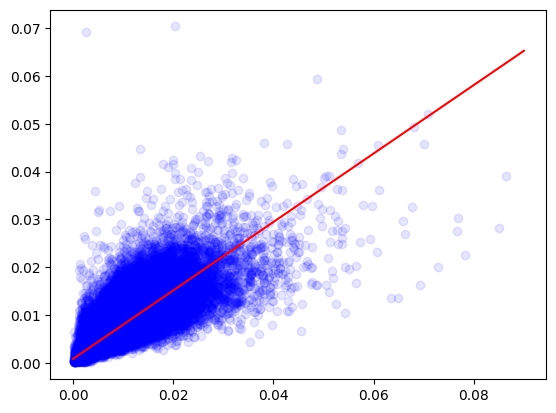

In [21]:
x=np.linspace(0,0.09)
y=x*model.coef_[0][0]+model.intercept_[0]

plt.plot(x,y,color="red")
plt.scatter(df_extended[["RV"]],df_extended[["target"]],color="blue",alpha=0.1)

plt.show()

Evidently, there is significant correlation between the target and the current RV. But the spread is not very indicative. TBH, we can use the linear model by RV as our trivial base model. 

## Observe the correlation when limited to stock 0.

In [25]:
df_extended[df_extended["stock_id"]==0][["target","RV"]].corr()

,target,RV
target,1.000000,0.840606
RV,0.840606,1.000000


In [26]:
model=LinearRegression()
model.fit(df_extended[df_extended["stock_id"]==0][["RV"]],df_extended[df_extended["stock_id"]==0][["target"]])
stock_0_linear=model.predict(df_extended[df_extended["stock_id"]==0][["RV"]])
training.rmspe(y_pred=stock_0_linear,y_true=df_extended[df_extended["stock_id"]==0][["target"]])

target    0.359974
dtype: float64

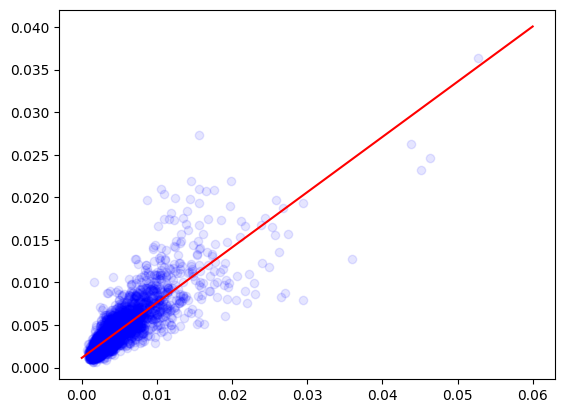

In [27]:
import matplotlib.pyplot as plt

x=np.linspace(0,0.06)
y=x*model.coef_[0][0]+model.intercept_[0]

plt.plot(x,y,color="red")
plt.scatter(df_extended[df_extended["stock_id"]==0][["RV"]],df_extended[df_extended["stock_id"]==0][["target"]],color="blue",alpha=0.1)

plt.show()

Although the correlation reduced, the spread seems "tighter". The loss is ever so slightly worse tho. 

## Observe the correlation when limited to time 5. 

In [28]:
df_extended[df_extended["time_id"]==5][["target","RV"]].corr()

,target,RV
target,1.000000,0.918001
RV,0.918001,1.000000


In [29]:
model=LinearRegression()
model.fit(df_extended[df_extended["time_id"]==5][["RV"]],df_extended[df_extended["time_id"]==5][["target"]])
stock_0_linear=model.predict(df_extended[df_extended["time_id"]==5][["RV"]])
training.rmspe(y_pred=stock_0_linear,y_true=df_extended[df_extended["time_id"]==5][["target"]])

target    0.165694
dtype: float64

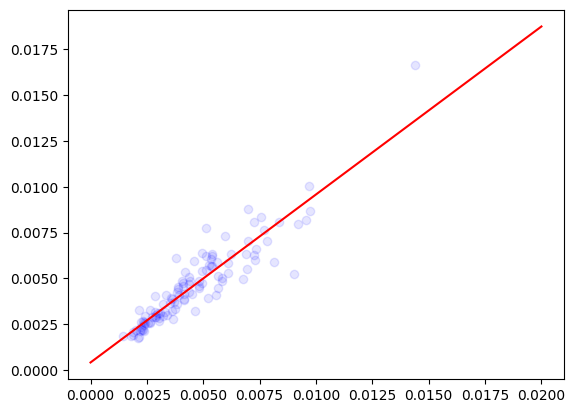

In [30]:
import matplotlib.pyplot as plt

x=np.linspace(0,0.02)
y=x*model.coef_[0][0]+model.intercept_[0]

plt.plot(x,y,color="red")
plt.scatter(df_extended[df_extended["time_id"]==5][["RV"]],df_extended[df_extended["time_id"]==5][["target"]],color="blue",alpha=0.1)

plt.show()

This is much more significant. The loss reduced greatly as well. 

## We also want to see this across all of the stock id and time ids, not just one of them. 

## - First, group by stock id. 

In [31]:
df_corr_by_stock=df_extended.groupby("stock_id")[["target","RV"]].corr()

In [32]:
df_corr_by_stock

target        RV
stock_id                           
0        target  1.000000  0.840606
         RV      0.840606  1.000000
1        target  1.000000  0.847510
         RV      0.847510  1.000000
2        target  1.000000  0.881656
...                   ...       ...
124      RV      0.882409  1.000000
125      target  1.000000  0.877262
         RV      0.877262  1.000000
126      target  1.000000  0.834651
         RV      0.834651  1.000000

[224 rows x 2 columns]

In [33]:
avg_corr_by_stock=(df_corr_by_stock["RV"].apply(abs).sum()-len(df_corr_by_stock)/2)/(len(df_corr_by_stock)/2)

In [34]:
avg_corr_by_stock

np.float64(0.8570502134452056)

The average of all correlation grouped by stock id is slightly higher than that of native. 

In [35]:
df_rmspe_linear_stock=df_extended.groupby("stock_id")[["target","RV"]].apply(training.rmspe_linear_df, list_feature=["RV"], str_target="target")

In [36]:
df_rmspe_linear_stock.mean()

target    0.30662
dtype: float64

## ** "On average", the target is "closer to linear" when grouped by stock. 

## - Now, group by time. 

In [37]:
df_corr_by_time=df_extended.groupby("time_id")[["target","RV"]].corr()

In [38]:
df_corr_by_time

target        RV
time_id                           
5       target  1.000000  0.918001
        RV      0.918001  1.000000
11      target  1.000000  0.822928
        RV      0.822928  1.000000
16      target  1.000000  0.804232
...                  ...       ...
32758   RV      0.733892  1.000000
32763   target  1.000000  0.595437
        RV      0.595437  1.000000
32767   target  1.000000  0.782757
        RV      0.782757  1.000000

[7660 rows x 2 columns]

In [39]:
avg_corr_by_time=(df_corr_by_time["RV"].apply(abs).sum()-len(df_corr_by_time)/2)/(len(df_corr_by_time)/2)

In [40]:
avg_corr_by_time

np.float64(0.8418139301097685)

The average correlation grouped by time is roughly the same as native. 

In [41]:
df_rmspe_linear_time=df_extended.groupby("time_id")[["target","RV"]].apply(training.rmspe_linear_df, list_feature=["RV"], str_target="target")

In [42]:
df_rmspe_linear_time.mean()

target    0.228626
dtype: float64

## ** "On average", the target is "much closer to linear" when grouped by time. However, this is not all good new, we simply can not be training with the data at this very second to predict the future - we do not know the target with them as features. Can we somehow determine what time is "similar" to another time with some data? 

## - Above "grouping by to see improvement" can also be done with anova, let's try that. Since we have two categorical variables (stock_id and time_id), this is, technically, not an ancova. 

In [13]:
df_extended=df_extended.drop("row_id", axis=1)

In [14]:
df_extended["stock_id"]=df_extended["stock_id"].astype("category")
df_extended["time_id"]=df_extended["time_id"].astype("category")

In [15]:
print(df_extended["stock_id"].nunique())
print(df_extended["time_id"].nunique())

112
3830


In [16]:
df_extended

,stock_id,time_id,target,RV
0,0,5,0.004136,0.004499
1,0,11,0.001445,0.001204
2,0,16,0.002168,0.002369
3,0,31,0.002195,0.002574
4,0,62,0.001747,0.001894
...,...,...,...,...
428927,126,32751,0.003461,0.003691
428928,126,32753,0.003113,0.004104
428929,126,32758,0.004070,0.003118
428930,126,32763,0.003357,0.003661


In [17]:
total_mb=df_extended.memory_usage(deep=True).sum()/(1024**2)

In [18]:
total_mb

np.float64(7.9323577880859375)

## - The attempt with smf on both stock_id and time_id together, it is far too memory heavy

In [ ]:
df_describe=df_extended.groupby("time_id")["target"].describe()

In [ ]:
df_describe

,count,mean,std,min,25%,50%,75%,max
time_id,,,,,,,,
5,112.0,0.004618,0.002179,0.001742,0.002958,0.004270,0.005864,0.016663
11,112.0,0.002042,0.001085,0.000472,0.001293,0.001831,0.002448,0.007245
16,112.0,0.002471,0.000774,0.001239,0.001970,0.002354,0.002819,0.006047
31,112.0,0.002700,0.001431,0.000410,0.001808,0.002201,0.003173,0.008159
62,112.0,0.002448,0.001146,0.000713,0.001617,0.002254,0.002917,0.007238
...,...,...,...,...,...,...,...,...
32751,112.0,0.002870,0.001261,0.001038,0.001865,0.002546,0.003726,0.006906
32753,112.0,0.001998,0.001340,0.000424,0.001295,0.001690,0.002447,0.012414
32758,112.0,0.002517,0.000877,0.001159,0.001778,0.002478,0.003147,0.005232


## Remark: See above, pretty sure sphericity is violated, this is varified with the use of pg.rm_anova as well. This means that model built with smf.ols can be miss leading, and mixedlm is prefered. But no harm in trying both. 

## -- The dataset might be too large for memory, most likely because there are far too many time_id. I will randomly take some time_id (say, 100 of the 3830) to do the anova. 

In [19]:
df_extended["stock_id"]=df_extended["stock_id"].astype(int)
df_extended["time_id"]=df_extended["time_id"].astype(int)

In [20]:
chose_time_id=random.choices(list(df_extended["time_id"].values),k=100)

In [21]:
len(chose_time_id)

100

In [22]:
df_extended_sample=df_extended[df_extended["time_id"].isin(chose_time_id)]

In [23]:
df_extended_sample["stock_id"]=df_extended_sample["stock_id"].astype("category")
df_extended_sample["time_id"]=df_extended_sample["time_id"].astype("category")

/tmp/ipykernel_6128/1957561291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended_sample["stock_id"]=df_extended_sample["stock_id"].astype("category")
/tmp/ipykernel_6128/1957561291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended_sample["time_id"]=df_extended_sample["time_id"].astype("category")


In [24]:
anova_model=smf.ols("target ~ C(stock_id) + C(time_id) + RV", data=df_extended_sample).fit()

## Remark: I choose type 2 and 3 since we might have unbalanced dataset. I am not looking for interaction, so I do not see need of type 3, but there are people online promoting type 3 over type 2 in case of unbalanced data, no harm to do both. 

In [25]:
anova_table=anova_lm(anova_model, type=2)

In [26]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(stock_id),111.0,0.020268,0.000183,142.303059,0.0
C(time_id),97.0,0.081147,0.000837,651.950258,0.0
RV,1.0,0.012107,0.012107,9435.340147,0.0
Residual,10764.0,0.013812,0.000001,NaN,NaN


In [27]:
anova_table=anova_lm(anova_model, type=3)

In [28]:
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(stock_id),111.0,0.020268,0.000183,142.303059,0.0
C(time_id),97.0,0.081147,0.000837,651.950258,0.0
RV,1.0,0.012107,0.012107,9435.340147,0.0
Residual,10764.0,0.013812,0.000001,NaN,NaN


In [ ]:
del anova_model
del anova_table
del df_extended_sample
gc.collect()

0

## -- I will also simply sample some of the data

In [29]:
df_extended_sample_frac=df_extended.sample(frac=0.1,random_state=666)

In [33]:
df_extended_sample_frac["stock_id"]=df_extended_sample_frac["stock_id"].astype("category")
df_extended_sample_frac["time_id"]=df_extended_sample_frac["time_id"].astype("category")

This might take a while. 

In [34]:
anova_model_frac=smf.ols("target ~ C(stock_id) + C(time_id) + RV", data=df_extended_sample_frac).fit()

In [35]:
anova_table_frac=anova_lm(anova_model_frac, type=2)
anova_table_frac

,df,sum_sq,mean_sq,F,PR(>F)
C(stock_id),111.0,0.068298,0.000615,564.121543,0.0
C(time_id),3829.0,0.211823,0.000055,50.719854,0.0
RV,1.0,0.034483,0.034483,31615.550222,0.0
Residual,38951.0,0.042484,0.000001,NaN,NaN


In [37]:
anova_table_frac=anova_lm(anova_model_frac, type=3)
anova_table_frac

,df,sum_sq,mean_sq,F,PR(>F)
C(stock_id),111.0,0.068298,0.000615,564.121543,0.0
C(time_id),3829.0,0.211823,0.000055,50.719854,0.0
RV,1.0,0.034483,0.034483,31615.550222,0.0
Residual,38951.0,0.042484,0.000001,NaN,NaN


In [38]:
del df_extended_sample_frac
del anova_model_frac
del anova_table_frac
gc.collect()

0

## -- fatten time id with the recovered time id ordering 

We have the recovered time id, and we can fatten the time id by renaming the time id according to a longer interval in the time id ordering. Notice that this might have miss leading results, since the time id order recovery method might not be 100 % correct. 

In [39]:
time_id_order=np.load("../processed_data/recovered_time_id_order.npy")

In [40]:
time_id_order

array([ 4294, 31984, 31570, ..., 29316, 32195, 10890])

In [41]:
np.where(time_id_order==4294)[0][0]

np.int64(0)

Let's define a quicky function 

In [42]:
arr=np.linspace(start=0,stop=100,num=101)

In [43]:
def fatten_time_id(time_id,total_num=100): 
    steps=np.linspace(start=0,stop=3830,num=total_num+1)
    position= int(np.where(time_id_order==time_id)[0][0])
    for index in range(100): 
        if position <= steps[index+1]: 
            return index 
    print("ono")

In [44]:
fatten_time_id(4294)

0

In [45]:
fatten_time_id(10890)

99

In [46]:
df_extended["fatten_id"]=df_extended["time_id"].apply(lambda x: fatten_time_id(x))

In [70]:
df_extended

,stock_id,time_id,target,RV,fatten_id
0,0,5,0.004136,0.004499,93
1,0,11,0.001445,0.001204,88
2,0,16,0.002168,0.002369,36
3,0,31,0.002195,0.002574,79
4,0,62,0.001747,0.001894,77
...,...,...,...,...,...
428927,126,32751,0.003461,0.003691,85
428928,126,32753,0.003113,0.004104,88
428929,126,32758,0.004070,0.003118,65
428930,126,32763,0.003357,0.003661,25


In [71]:
df_extended[df_extended["target"].isnull()]

,stock_id,time_id,target,RV,fatten_id


In [72]:
df_extended[df_extended["RV"].isnull()]

,stock_id,time_id,target,RV,fatten_id


In [48]:
df_extended_fatten=df_extended.drop("time_id",axis=1)

In [49]:
df_extended_fatten

,stock_id,target,RV,fatten_id
0,0,0.004136,0.004499,93
1,0,0.001445,0.001204,88
2,0,0.002168,0.002369,36
3,0,0.002195,0.002574,79
4,0,0.001747,0.001894,77
...,...,...,...,...
428927,126,0.003461,0.003691,85
428928,126,0.003113,0.004104,88
428929,126,0.004070,0.003118,65
428930,126,0.003357,0.003661,25


In [74]:
df_extended_fatten[df_extended_fatten["target"].isnull()]

,stock_id,target,RV,fatten_id


In [75]:
df_extended_fatten[df_extended_fatten["RV"].isnull()]

,stock_id,target,RV,fatten_id


In [50]:
df_extended_fatten["stock_id"]=df_extended_fatten["stock_id"].astype("category")
df_extended_fatten["fatten_id"]=df_extended_fatten["fatten_id"].astype("category")

In [51]:
anova_model_fatten=smf.ols("target ~ C(stock_id) + C(fatten_id) + RV", data=df_extended_fatten).fit()

In [52]:
anova_table_fatten=anova_lm(anova_model_fatten,type=2)
anova_table_fatten

,df,sum_sq,mean_sq,F,PR(>F)
C(stock_id),111.0,0.722402,0.006508,4144.265187,0.0
C(fatten_id),99.0,1.357576,0.013713,8732.128043,0.0
RV,1.0,0.944625,0.944625,601520.591173,0.0
Residual,428720.0,0.673259,0.000002,NaN,NaN


In [53]:
anova_table_fatten=anova_lm(anova_model_fatten,type=3)
anova_table_fatten

,df,sum_sq,mean_sq,F,PR(>F)
C(stock_id),111.0,0.722402,0.006508,4144.265187,0.0
C(fatten_id),99.0,1.357576,0.013713,8732.128043,0.0
RV,1.0,0.944625,0.944625,601520.591173,0.0
Residual,428720.0,0.673259,0.000002,NaN,NaN


In [54]:
del anova_model_fatten
del anova_table_fatten
gc.collect()

0

## --- The fatten_id (or time id) is technically within, let's try use mixedlm. This is preferred over smf.ols as sphericity is not to be assumed for us (see later in pg.rm_anova). This can handle unbalanced data as well. 

In [67]:
mixed_fatten=smf.mixedlm("target ~ C(fatten_id) + RV", data=df_extended_fatten,groups="stock_id").fit()

/home/ycoeusz/.pyenv/versions/deep_learning_3_11_8/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [76]:
mixed_fatten_reduced=smf.mixedlm("target ~ RV", data=df_extended_fatten, groups="stock_id").fit()

/home/ycoeusz/.pyenv/versions/deep_learning_3_11_8/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ycoeusz/.pyenv/versions/deep_learning_3_11_8/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/ycoeusz/.pyenv/versions/deep_learning_3_11_8/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [77]:
loglf_diff=(mixed_fatten.llf-mixed_fatten_reduced.llf) * 2
degfree_diff=mixed_fatten.df_modelwc-mixed_fatten_reduced.df_modelwc 

chi2.sf(loglf_diff,degfree_diff)

np.float64(0.0)

## -- Let's play with pingouin. Although, according to documentations, it is much more memory friendly than smf.ols, I could not find a way for it to take into account the continuous variable of RV. 

Not sure if rm_anova can handle unbalanced dataset, I will remove the stock id that have missing time id. This can be found in miss_time_points.ipynb: 

In [78]:
list_miss=[13,38,75,80,100]

With eps so small, sphericity is definitely not valid, I need p-GG-corr. But it is not showing for some reason. 

In [79]:
pg.rm_anova(data=df_extended_fatten[~df_extended_fatten["stock_id"].isin(list_miss)],dv="target",within="fatten_id",subject="stock_id",detailed=True)

/home/ycoeusz/.pyenv/versions/deep_learning_3_11_8/lib/python3.11/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,fatten_id,0.033071,99,3.340502e-04,516.048551,0.0,0.58896,0.041215
1,Error,0.006793,10494,6.473233e-07,NaN,NaN,NaN,NaN


Am I brave enough? Who knows. 

In [60]:
df_extended

,stock_id,time_id,target,RV,fatten_id
0,0,5,0.004136,0.004499,93
1,0,11,0.001445,0.001204,88
2,0,16,0.002168,0.002369,36
3,0,31,0.002195,0.002574,79
4,0,62,0.001747,0.001894,77
...,...,...,...,...,...
428927,126,32751,0.003461,0.003691,85
428928,126,32753,0.003113,0.004104,88
428929,126,32758,0.004070,0.003118,65
428930,126,32763,0.003357,0.003661,25


In output below, we can see that sphericity assumption is not valid, so we should prefer p-GG-corr. W-spher being inf is a bit worrying (it should be between 0 and 1), one way this can happen is when there is zero variance in some time id. 

In [81]:
pg.rm_anova(data=df_extended[~df_extended["stock_id"].isin(list_miss)],dv="target",within="time_id",subject="stock_id")

/home/ycoeusz/.pyenv/versions/deep_learning_3_11_8/lib/python3.11/site-packages/pingouin/distribution.py:1004: RuntimeWarning: divide by zero encountered in scalar divide
  W = np.prod(eig) / (eig.sum() / d) ** d


,Source,ddof1,ddof2,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,time_id,3829,405874,275.433413,0.0,0.0,0.587913,0.003315,False,inf,0.0


In [82]:
df_describe[df_describe["std"]==0]

,count,mean,std,min,25%,50%,75%,max
time_id,,,,,,,,


Hmmm, not sure what is causing the inf w-spher. 

## ** In the first method where I sampled 100 of the time_ids, the reduction in the category number would have inflated the impact of the variable (can be seen through the huge F value). This is why I did the sample method, in which the total number of time id category is maintained, the impact reduced, but still is huge. Just take a look at the p values, last time I checked 0 is like the smallest non negative values, we should most definitely try to include the categorical data of time id and stock id into our model. There are many ways we can do this in deep learning: learned embedding (can be good for both ordinal (time id) and non ordinal (stock id) data, depending on if I feel it in with order(at least according to my readings)), one hot (same as hot mess) encoding (good for non ordinal variable, like stock id, but can be memory consuming and inefficient, ordinal encoding (clearly, would only work with time id)), or target (or otherwise parameter) encoding (this is, seemingly, what the top kaggle solution went for). 

## ** In summary, THERE IS SIGNIFICANT SIGNAL THAT BOTH STOCK ID AND TIME ID ARE IMPACTFUL TO THE TARGET. We SHOULD consider using category in training. 

## Take a look between all other correlations. 

In [19]:
df_extended

,stock_id,time_id,target,row_id,RV,price_mean,price_std,size_sum,size_mean,size_std,order_count_sum,order_count_mean,order_count_std
0,0,5,0.004136,0-5,0.004499,1.003722,0.000578,3179,79.475000,118.375107,110,2.750000,2.467741
1,0,11,0.001445,0-11,0.001204,1.000206,0.000304,1289,42.966667,77.815203,57,1.900000,1.446756
2,0,16,0.002168,0-16,0.002369,0.999204,0.000932,2161,86.440000,113.587000,68,2.720000,2.300725
3,0,31,0.002195,0-31,0.002574,0.999020,0.000729,1962,130.800000,144.828569,59,3.933333,4.043808
4,0,62,0.001747,0-62,0.001894,0.999618,0.000182,1791,81.409091,117.914682,89,4.045455,4.099678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428908,126,32751,0.003461,126-32751,0.003691,0.999289,0.000461,2570,69.459459,102.734446,103,2.783784,2.819921
428909,126,32753,0.003113,126-32753,0.004104,1.002344,0.001231,2323,54.023256,71.029668,147,3.418605,3.587230
428910,126,32758,0.004070,126-32758,0.003118,1.000673,0.000409,3740,106.857143,115.182245,98,2.800000,1.937251
428911,126,32763,0.003357,126-32763,0.003661,1.001855,0.000387,9389,117.362500,140.992346,234,2.925000,2.348040


In [22]:
df_extended[["target","RV","price_mean","price_std","size_sum","size_mean","size_std","order_count_sum","order_count_mean","order_count_std"]].corr()

,target,RV,price_mean,price_std,size_sum,size_mean,size_std,order_count_sum,order_count_mean,order_count_std
target,1.000000,0.873782,-0.023548,0.685310,0.036423,-0.041525,-0.023388,0.082365,0.087330,0.107899
RV,0.873782,1.000000,-0.026452,0.755767,0.061300,-0.029060,-0.006442,0.100515,0.116373,0.137080
price_mean,-0.023548,-0.026452,1.000000,-0.023921,-0.001870,0.000117,0.001766,-0.014494,-0.016941,-0.050148
price_std,0.685310,0.755767,-0.023921,1.000000,0.239589,0.041973,0.075528,0.271430,0.232596,0.235616
size_sum,0.036423,0.061300,-0.001870,0.239589,1.000000,0.350246,0.433300,0.855826,0.550194,0.445630
size_mean,-0.041525,-0.029060,0.000117,0.041973,0.350246,1.000000,0.904942,0.110007,0.575979,0.319306
size_std,-0.023388,-0.006442,0.001766,0.075528,0.433300,0.904942,1.000000,0.162184,0.537032,0.423851
order_count_sum,0.082365,0.100515,-0.014494,0.271430,0.855826,0.110007,0.162184,1.000000,0.524459,0.501499
order_count_mean,0.087330,0.116373,-0.016941,0.232596,0.550194,0.575979,0.537032,0.524459,1.000000,0.721062
order_count_std,0.107899,0.137080,-0.050148,0.235616,0.445630,0.319306,0.423851,0.501499,0.721062,1.000000


In [46]:
list_features=["RV","price_mean","price_std","size_sum","size_mean","size_std","order_count_sum","order_count_mean","order_count_std"]

handling feature RV


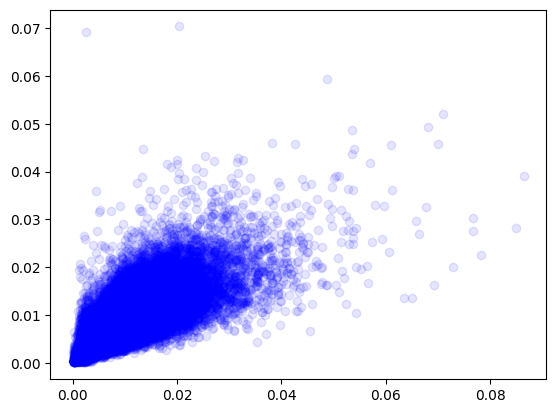

rmspe of linear model with feature RV is target    0.353694
dtype: float64
handling feature price_mean


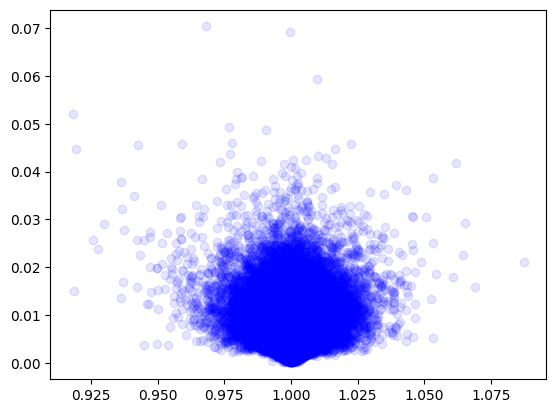

rmspe of linear model with feature price_mean is target    1.108437
dtype: float64
handling feature price_std


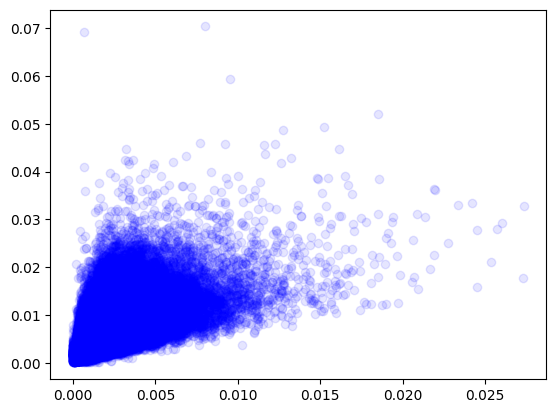

rmspe of linear model with feature price_std is target    0.658072
dtype: float64
handling feature size_sum


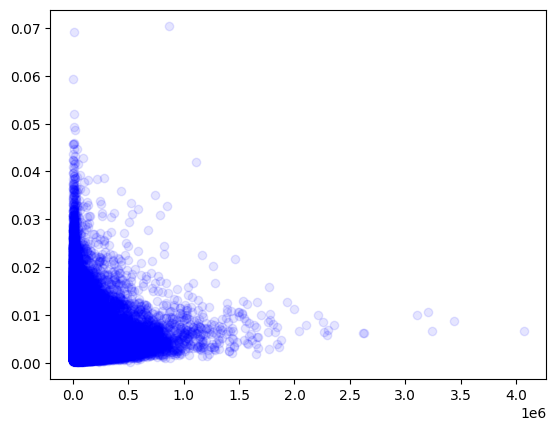

rmspe of linear model with feature size_sum is target    1.112496
dtype: float64
handling feature size_mean


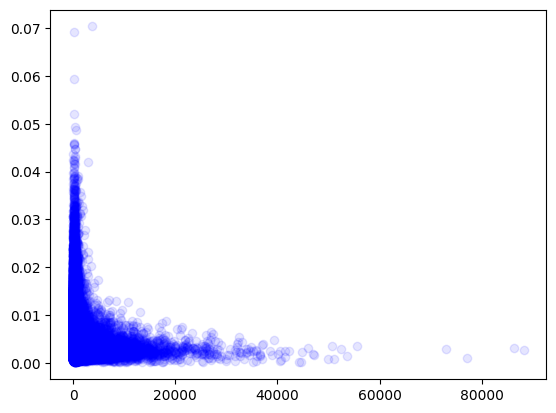

rmspe of linear model with feature size_mean is target    1.096313
dtype: float64
handling feature size_std


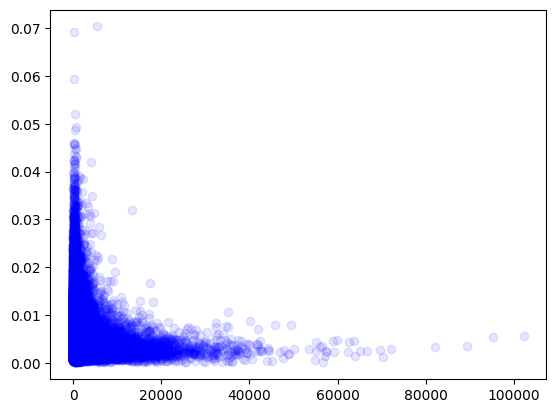

rmspe of linear model with feature size_std is target    1.101281
dtype: float64
handling feature order_count_sum


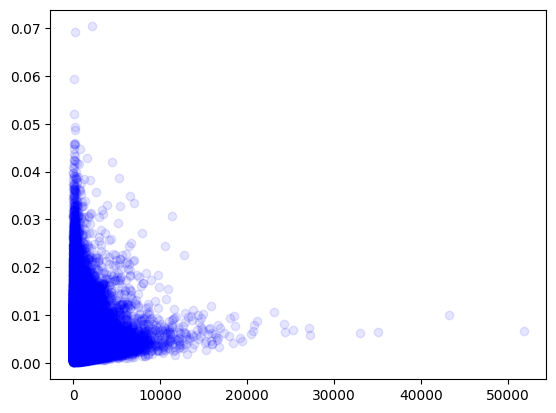

rmspe of linear model with feature order_count_sum is target    1.106653
dtype: float64
handling feature order_count_mean


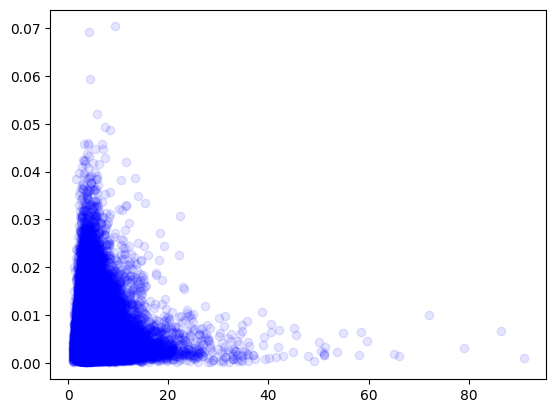

rmspe of linear model with feature order_count_mean is target    1.143726
dtype: float64
handling feature order_count_std


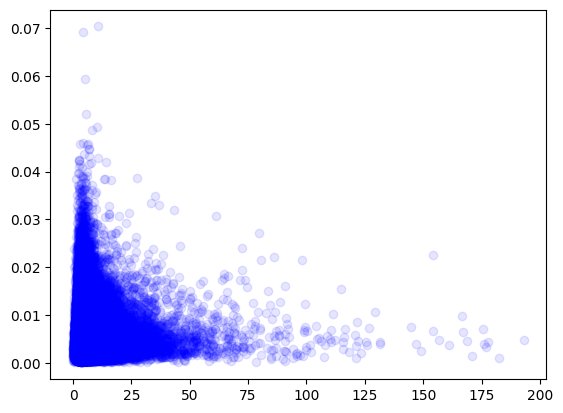

rmspe of linear model with feature order_count_std is target    1.12913
dtype: float64


In [47]:
for feature in list_features: 
    print("handling feature "+feature)
    rmspe=training.rmspe_linear_df(list_feature=[feature],str_target="target",df=df_extended.dropna())
    plt.scatter(df_extended[[feature]],df_extended[["target"]],color="blue",alpha=0.1)
    plt.show()
    print("rmspe of linear model with feature "+feature+" is",rmspe)

In addition to "RV", Price_std seems like another valuable choice. We will also create multiplicative inverse (after scaling) of following features are attempt another linear regression on the inverse value, I am not sure this will help, it is simply the case that their "upper boundary" looked have a shape (up to rescaling) akin to 1/x. 

In [51]:
list_features_need_inv=["size_sum","size_mean","size_std","order_count_sum","order_count_mean","order_count_std"]

Add an eps to avoid dividing by zero. 

In [53]:
eps=sys.float_info.epsilon

In [64]:
df_extended["size_sum"].mean()

np.float64(31861.625502141458)

In [67]:
list_feature_need_inv_mean=[df_extended[feature].mean() for feature in list_features_need_inv]

In [68]:
list_feature_need_inv_mean

[np.float64(31861.625502141458),
 np.float64(320.67836629412955),
 np.float64(464.1889402629512),
 np.float64(373.45338565163564),
 np.float64(3.7749791506968062),
 np.float64(4.034571029495433)]

In [69]:
df_m_inv=df_extended[list_features_need_inv+["row_id","target"]].agg({"size_sum":lambda x: list_feature_need_inv_mean[0]/(x+eps), "size_mean": lambda x: list_feature_need_inv_mean[1]/(x+eps), \
                                                                      "size_std": lambda x: list_feature_need_inv_mean[2]/(x+eps), "order_count_sum":lambda x: list_feature_need_inv_mean[3]/(x+eps), \
                                                                      "order_count_mean": lambda x: list_feature_need_inv_mean[4]/(x+eps), "order_count_std": lambda x: list_feature_need_inv_mean[5]/(x+eps), \
                                                                      "row_id": lambda x: x, "target":lambda x:x}).reset_index(drop=True)

/tmp/ipykernel_24378/3765143300.py:1: FutureWarning: using <function <lambda> at 0x7fbccea14cc0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df_m_inv=df_extended[list_features_need_inv+["row_id","target"]].agg({"size_sum":lambda x: list_feature_need_inv_mean[0]/(x+eps), "size_mean": lambda x: list_feature_need_inv_mean[1]/(x+eps), \
/tmp/ipykernel_24378/3765143300.py:1: FutureWarning: using <function <lambda> at 0x7fbcd2d22520> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df_m_inv=df_extended[list_features_need_inv+["row_id","target"]].agg({"size_sum":lambda x: list_feature_need_inv_mean[0]/(x+eps), "size_mean": lambda x: list_feature_need_inv_mean[1]/(x+eps), \
/tmp/ipykernel_24378/3765143300.py:1: FutureWarning: using <function <lambda> at 0x7fbcd2d21a80> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  

In [70]:
df_m_inv

,size_sum,size_mean,size_std,order_count_sum,order_count_mean,order_count_std,row_id,target
0,10.022531,4.034959,3.921339,3.395031,1.372720,1.634925,0-5,0.004136
1,24.718096,7.463422,5.965273,6.551814,1.986831,2.788701,0-11,0.001445
2,14.743927,3.709838,4.086638,5.491962,1.387860,1.753609,0-16,0.002168
3,16.239361,2.451669,3.205092,6.329718,0.959740,0.997716,0-31,0.002195
4,17.789852,3.939098,3.936651,4.196105,0.933141,0.984119,0-62,0.001747
...,...,...,...,...,...,...,...,...
428908,12.397520,4.616770,4.518338,3.625761,1.356060,1.430739,126-32751,0.003461
428909,13.715723,5.935932,6.535142,2.540499,1.104246,1.124704,126-32753,0.003113
428910,8.519151,3.001001,4.030039,3.810749,1.348207,2.082627,126-32758,0.004070
428911,3.393506,2.732375,3.292299,1.595955,1.290591,1.718272,126-32763,0.003357


handling feature size_sum


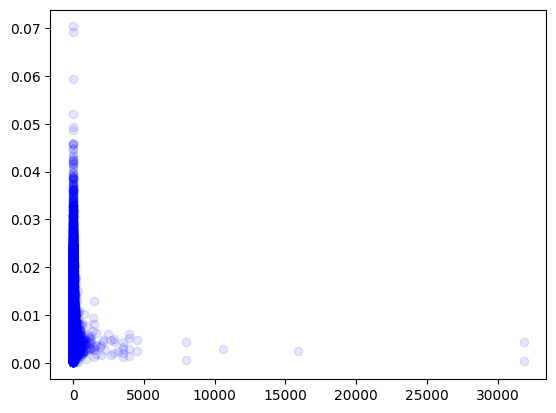

rmspe of linear model with feature size_sum is target    1.107269
dtype: float64
handling feature size_mean


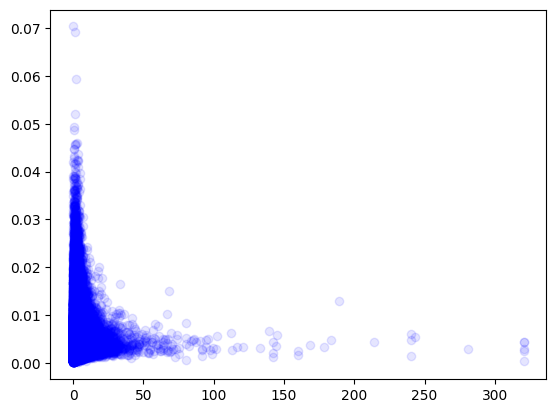

rmspe of linear model with feature size_mean is target    1.093872
dtype: float64
handling feature size_std


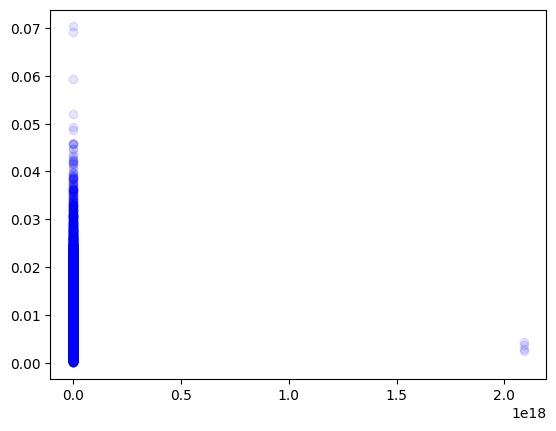

rmspe of linear model with feature size_std is target    1.108895
dtype: float64
handling feature order_count_sum


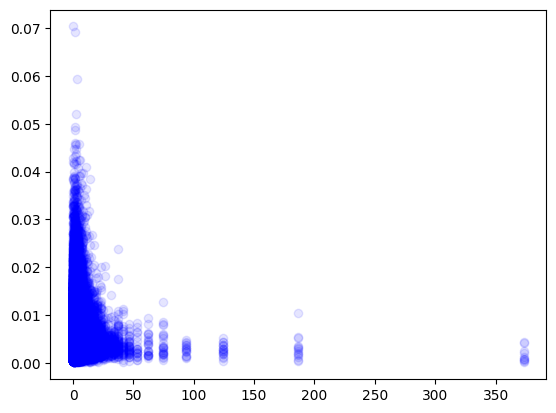

rmspe of linear model with feature order_count_sum is target    1.108746
dtype: float64
handling feature order_count_mean


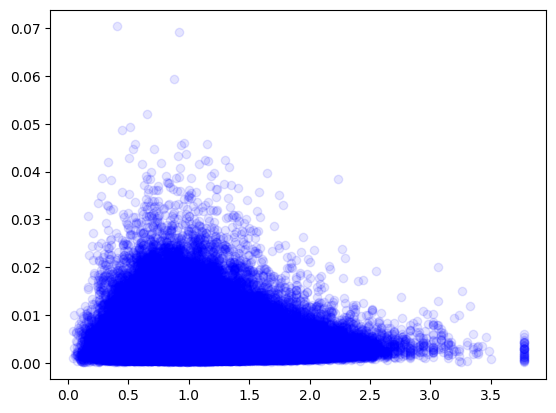

rmspe of linear model with feature order_count_mean is target    1.135694
dtype: float64
handling feature order_count_std


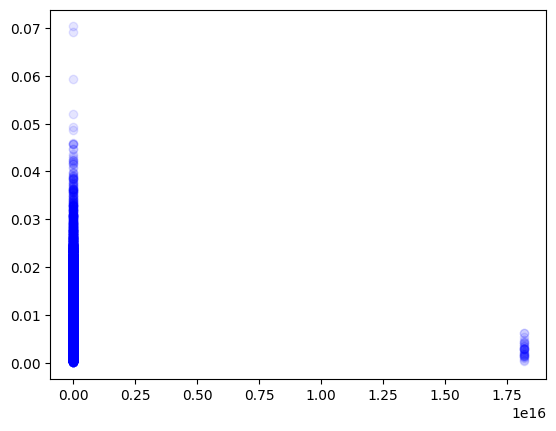

rmspe of linear model with feature order_count_std is target    1.108815
dtype: float64


In [71]:
for feature in list_features_need_inv: 
    print("handling feature "+feature)
    rmspe=training.rmspe_linear_df(list_feature=[feature],str_target="target",df=df_m_inv.dropna())
    plt.scatter(df_m_inv[[feature]],df_m_inv[["target"]],color="blue",alpha=0.1)
    plt.show()
    print("rmspe of linear model with feature "+feature+" is",rmspe)

Oh well, I tried, it did not help (according to the bad rmspe). But these "not helpful" values are can still be indicators that might be helpful when deciding nearest neighbors. 

## Looking for good indicator as metric for creating nearest neighbors. 

## First, nearest neighbor for time id: 

We will eventually be able to use local timeseries features to take a look, but before the timeseries creation function is all set up, let's start with taking a look at the distribution of various features already available. 

First, lets start with RV as a feature. 

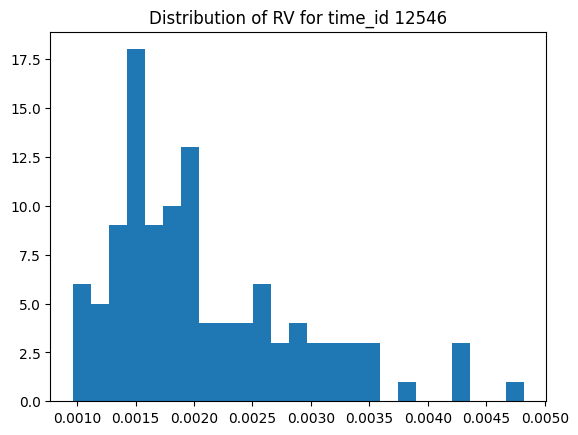

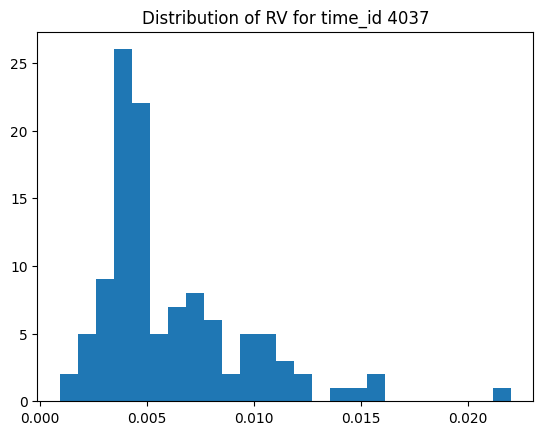

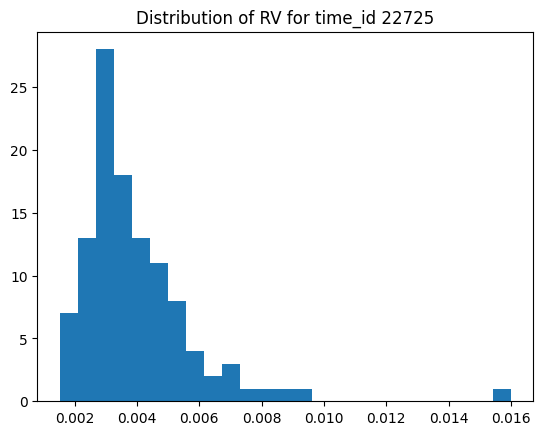

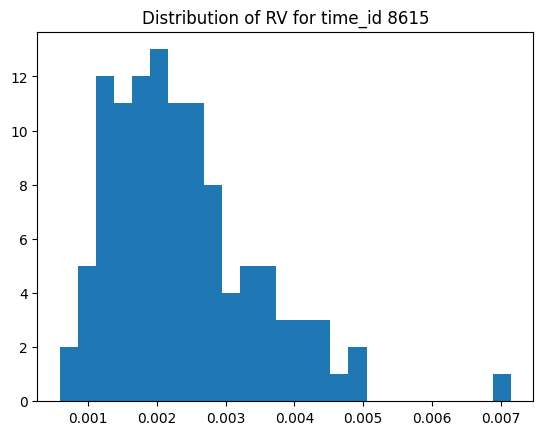

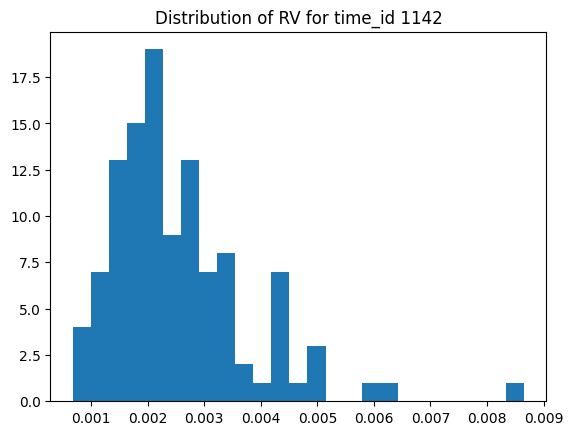

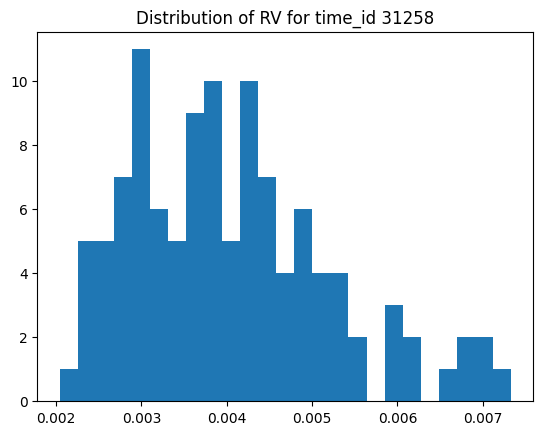

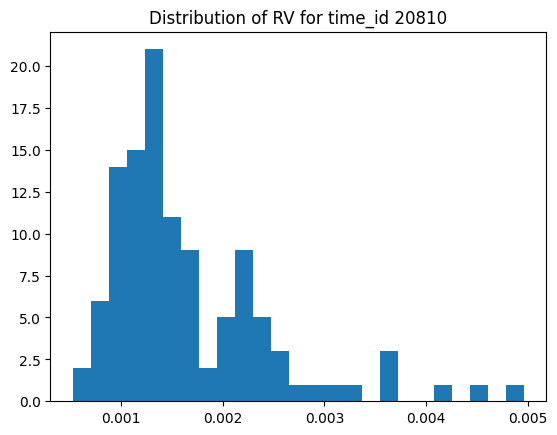

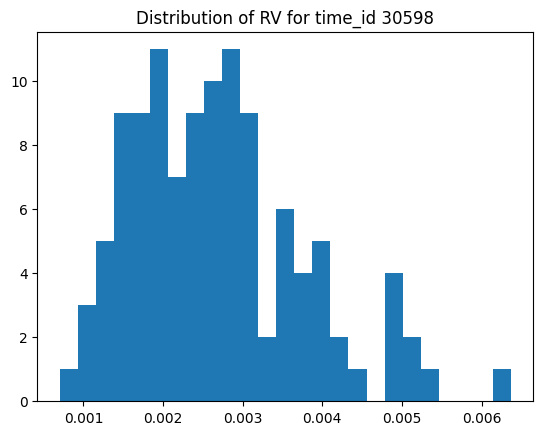

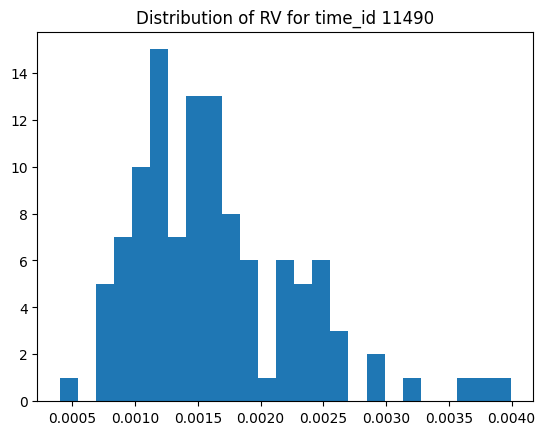

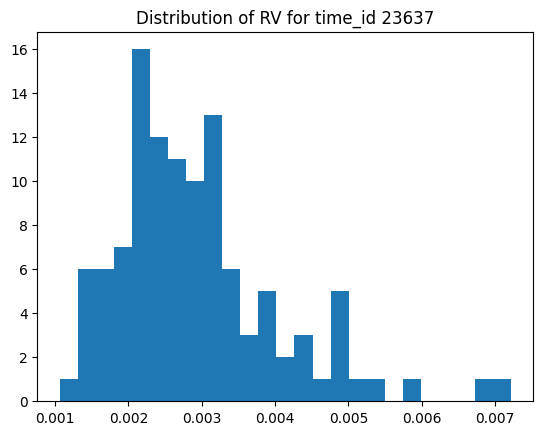

In [91]:
list_rand_time=random.choices(df_extended["time_id"].to_list(),k=10)

for time in list_rand_time: 
    plt.hist(df_extended[df_extended["time_id"]==time]["RV"], bins=25)
    plt.title("Distribution of RV for time_id "+str(time))
    plt.show()


All of them seem to have a "pattern" akin to beta distribution, I wonder if this can help me with deciding "distance" between two time ids. Finding the alpha and beta according to the shape can be hard, maybe the mean and std can be good enough. 

Let's do similar things for other features: Now price. It looks almost normal! So mean and std of price_mean might be helpful as well. 

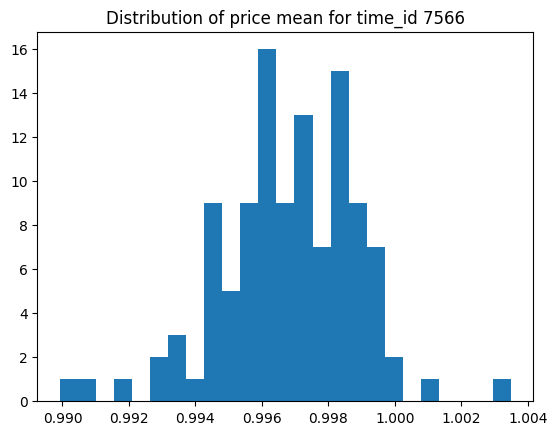

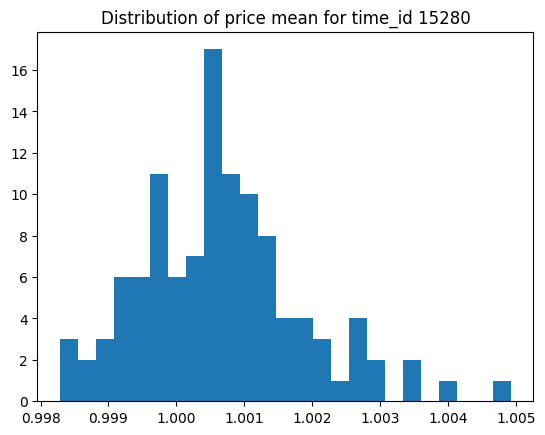

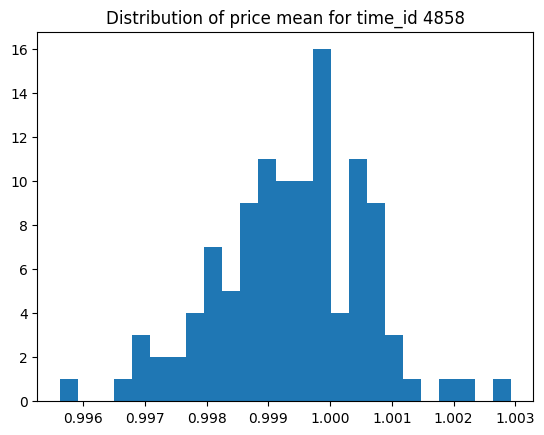

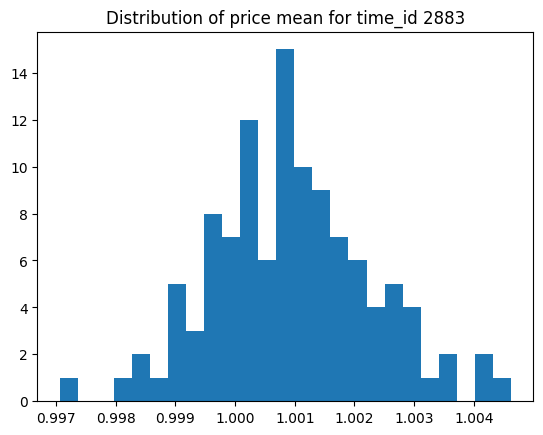

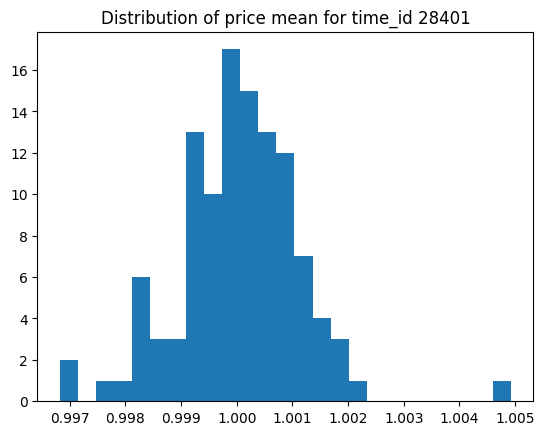

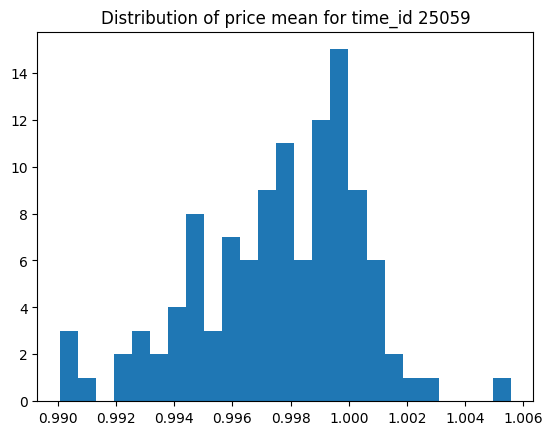

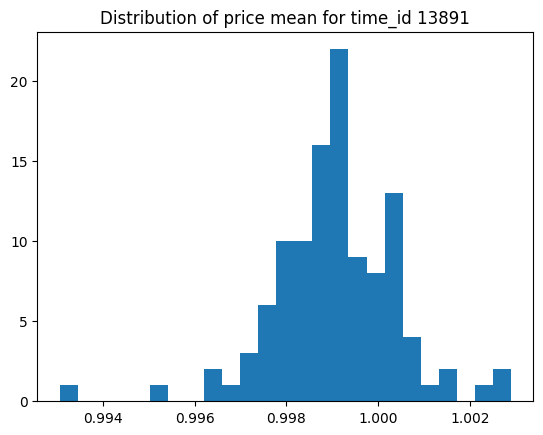

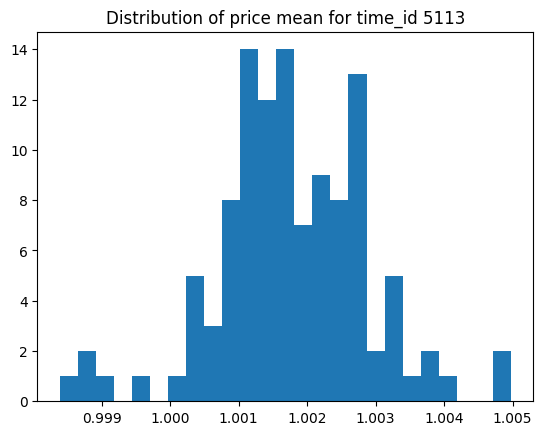

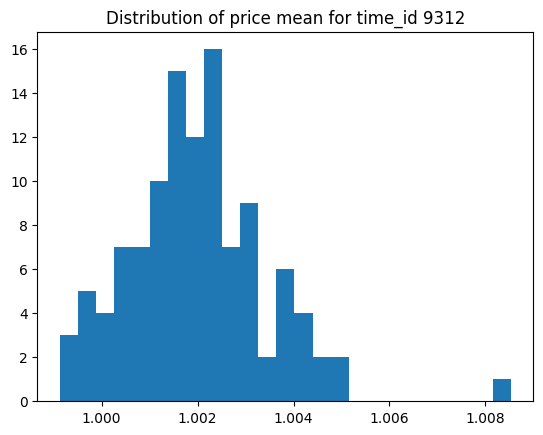

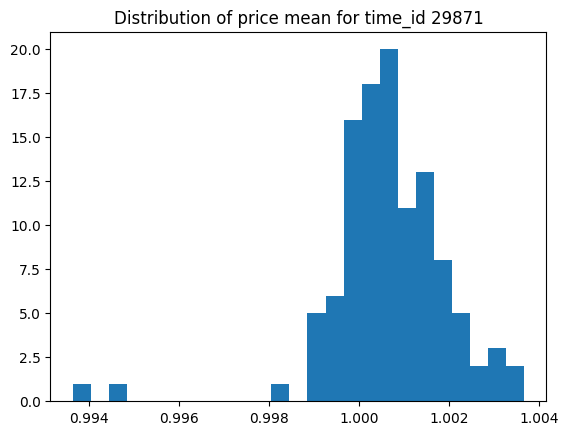

In [93]:
list_rand_time=random.choices(df_extended["time_id"].to_list(),k=10)

for time in list_rand_time: 
    plt.hist(df_extended[df_extended["time_id"]==time]["price_mean"], bins=25)
    plt.title("Distribution of price mean for time_id "+str(time))
    plt.show()


Now for price_std: 

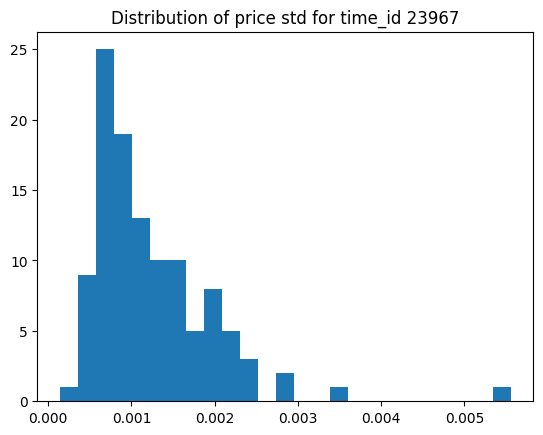

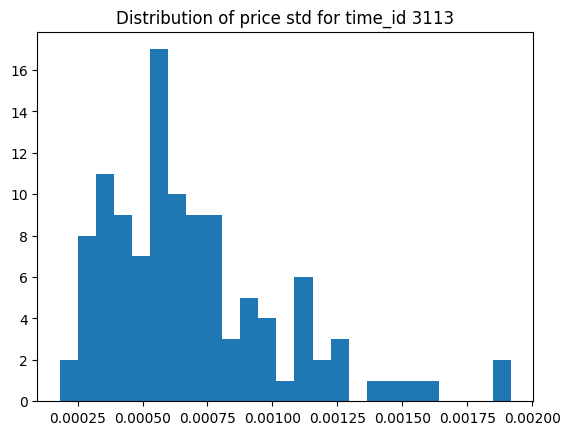

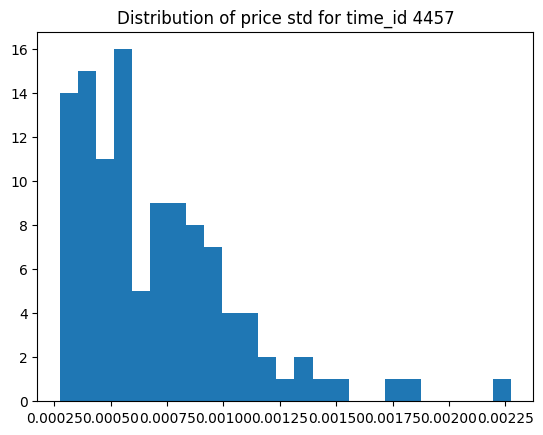

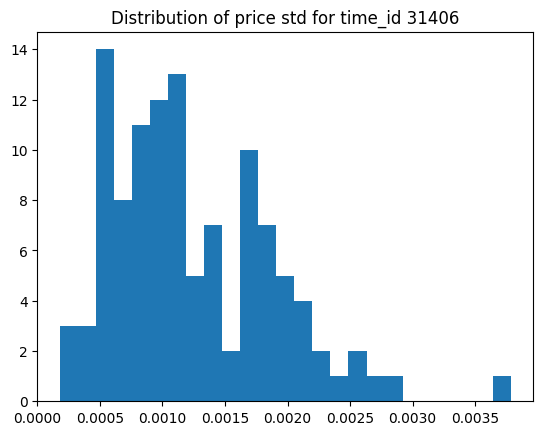

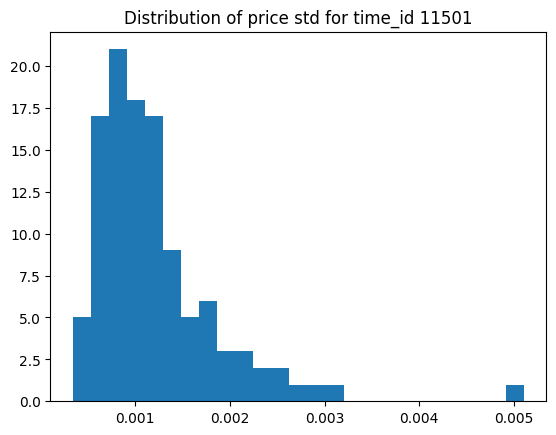

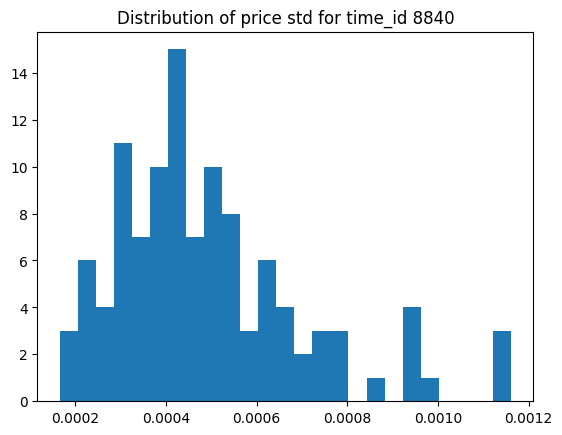

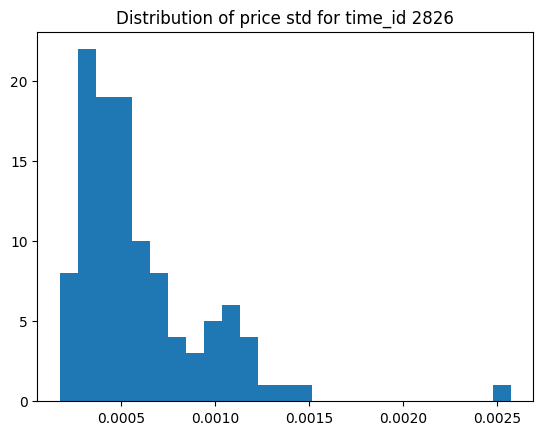

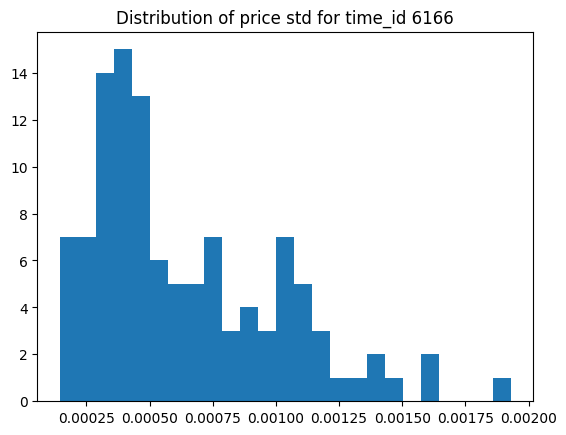

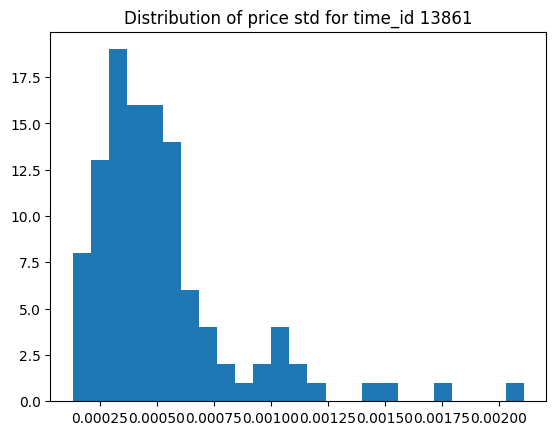

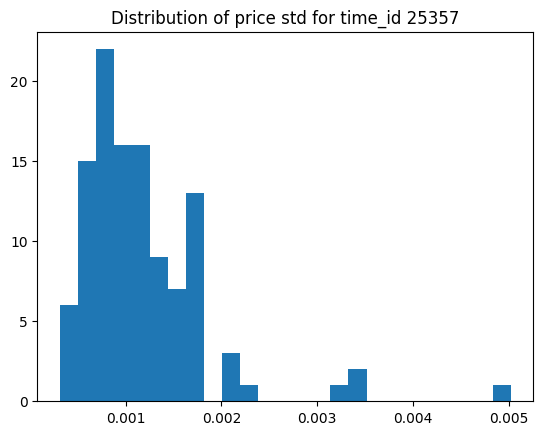

In [94]:
list_rand_time=random.choices(df_extended["time_id"].to_list(),k=10)

for time in list_rand_time: 
    plt.hist(df_extended[df_extended["time_id"]==time]["price_std"], bins=25)
    plt.title("Distribution of price std for time_id "+str(time))
    plt.show()